**Group Members**

1.Watcharavit Lapinee

2.Varisara Boonyuang

3.Wisansaya Tipparot

# **Load Dependencies**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 20.5 MB/s 
     |████████████████████████████████| 271 kB 51.4 MB/s 
     |████████████████████████████████| 1.3 MB 50.6 MB/s 
     |████████████████████████████████| 14.6 MB 118 kB/s 
     |████████████████████████████████| 2.0 MB 52.4 MB/s 
     |████████████████████████████████| 1.7 MB 65.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 248 kB 41.8 MB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 111 kB 68.6 MB/s 
     |████████████████████████████████| 167 kB 72.3 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 6.8 MB 55.0 MB/s 
     |████████████████████████████████| 3.1 MB 45.9 MB/s 
     |████████████████████████████████| 10.1 MB 44.2 MB/s 
     |███████████████

In [ ]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Customer-analytic-workshops/Supermarket Data.csv')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 956574 non-null  int64  
 1   SHOP_DATE                 956574 non-null  int64  
 2   SHOP_WEEKDAY              956574 non-null  int64  
 3   SHOP_HOUR                 956574 non-null  int64  
 4   QUANTITY                  956574 non-null  int64  
 5   SPEND                     956574 non-null  float64
 6   PROD_CODE                 956574 non-null  object 
 7   PROD_CODE_10              956574 non-null  object 
 8   PROD_CODE_20              956574 non-null  object 
 9   PROD_CODE_30              956574 non-null  object 
 10  PROD_CODE_40              956574 non-null  object 
 11  CUST_CODE                 8

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
956569,200617,2006-06-22,5,12,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994101100088778,M,MM,Top Up,Fresh,STORE00002,LS,W01
956570,200633,2006-10-13,6,20,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102700099738,L,LA,Top Up,Fresh,STORE00002,LS,W01
956571,200617,2006-06-22,5,18,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,994101100506174,L,LA,Top Up,Fresh,STORE00002,LS,W01
956572,200619,2006-07-06,5,19,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,994101300433650,L,LA,Full Shop,Fresh,STORE00002,LS,W01
956573,200635,2006-10-23,2,21,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102900104676,L,MM,Top Up,Fresh,STORE00002,LS,W01


In [ ]:
df.info

<bound method DataFrame.info of         SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0          200732 2007-10-05             6         17         3   6.75   
1          200733 2007-10-10             4         20         3   6.75   
2          200741 2007-12-09             1         11         1   2.25   
3          200731 2007-09-29             7         17         1   2.25   
4          200737 2007-11-10             7         14         3   6.75   
...           ...        ...           ...        ...       ...    ...   
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
0    

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [ ]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max')
                                                                                  ).reset_index()

df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22


In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [ ]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1


In [ ]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,TicketSize,total_days,recency
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,2.440000,1,547
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,4.360591,812,1
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,20.535625,338,13
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,1.983333,65,730
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,9.935000,610,14


# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE', 'FirstDate', 'LastDate'], normalize=True)

,Description,Value
0,session_id,3415
1,Original Data,"(6100, 9)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6100, 6)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7efcbe5a4dd0>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7efcbe5...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7efcbe5a9170>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7efcbe585e60>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7efcbe585c20>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7efcbe585ef0>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1711,97.1614,5.6634,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.764200,70.662300,0.175200,0,0,0
birch,0.450100,1863.849900,0.841900,0,0,0
kmeans,0.439900,3792.438400,0.869300,0,0,0
dbscan,0.374800,424.315100,1.063900,0,0,0
hclust,0.352100,2891.687100,0.997400,0,0,0
ap,0.000000,0.000000,0.000000,0,0,0
kmodes,-0.171100,97.161400,5.663400,0,0,0


# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7642,70.6623,0.1752,0,0,0


In [ ]:
plot_model(sc)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.435,3746.4909,0.894,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3415, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

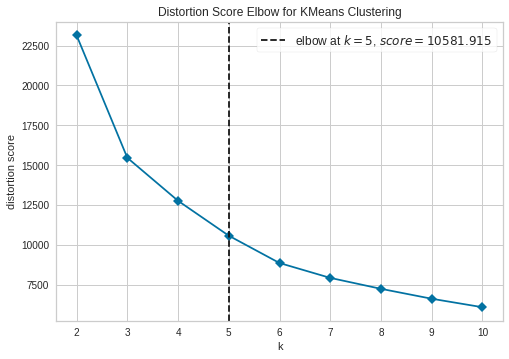

In [ ]:
plot_model(kmeans, plot = 'elbow')

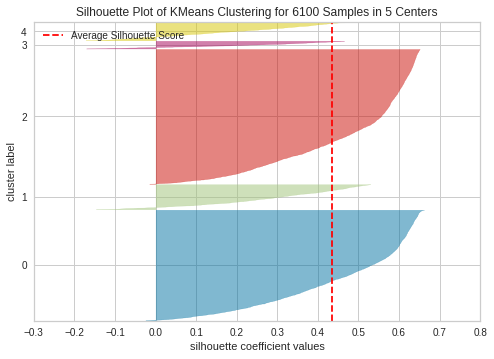

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
plot_model(kmeans, plot = 'tsne')

In [ ]:
plot_model(kmeans, plot = 'distribution')

In [ ]:
kmeanResults = assign_model(kmeans)
kmeanResults.head()

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,TicketSize,total_days,recency,Cluster
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,2.440000,1,547,Cluster 2
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,4.360591,812,1,Cluster 1
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,20.535625,338,13,Cluster 0
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,1.983333,65,730,Cluster 2
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,9.935000,610,14,Cluster 0


# Cluster 0

In [ ]:
cluster0 = kmeanResults[kmeanResults['Cluster'] == 'Cluster 0']
cluster0.describe()

,TotalSpend,TotalVisits,TotalSKUs,TicketSize,total_days,recency
count,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000
mean,103.637538,12.889864,34.504607,8.007185,570.439228,63.321194
std,129.853570,14.968966,37.137051,6.848272,186.639704,67.544122
min,0.020000,2.000000,1.000000,0.010000,68.000000,0.000000
25%,13.095000,3.000000,6.000000,2.700000,440.000000,16.500000
50%,49.820000,7.000000,20.000000,6.003333,614.000000,41.000000
75%,140.475000,16.000000,51.000000,11.434611,728.000000,82.000000
max,944.750000,146.000000,182.000000,32.515000,819.000000,359.000000


# Cluster 1

In [ ]:
cluster1 = kmeanResults[kmeanResults['Cluster'] == 'Cluster 1']
cluster1.describe()

,TotalSpend,TotalVisits,TotalSKUs,TicketSize,total_days,recency
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,1171.685446,93.168605,232.782946,16.065668,765.383721,10.432171
std,588.837328,52.311508,87.284800,10.390639,88.633181,13.114035
min,238.530000,19.000000,56.000000,1.820840,215.000000,0.000000
25%,720.247500,54.000000,170.000000,7.901399,766.750000,2.000000
50%,1010.870000,82.000000,217.000000,13.765721,800.500000,6.000000
75%,1556.492500,118.000000,287.250000,21.862657,811.000000,14.000000
max,4071.040000,295.000000,528.000000,57.338592,819.000000,102.000000


# Cluster 2

In [ ]:
cluster2 = kmeanResults[kmeanResults['Cluster'] == 'Cluster 2']
cluster2.describe()

,TotalSpend,TotalVisits,TotalSKUs,TicketSize,total_days,recency
count,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000
mean,10.358782,1.675793,5.579971,5.521646,41.543228,444.673271
std,19.131705,1.483873,8.184852,6.142820,87.446249,207.905260
min,0.010000,1.000000,1.000000,0.010000,1.000000,48.000000
25%,1.430000,1.000000,1.000000,1.190000,1.000000,274.000000
50%,4.010000,1.000000,3.000000,3.007500,1.000000,435.000000
75%,11.592500,2.000000,6.000000,7.680833,21.250000,626.250000
max,339.960000,20.000000,91.000000,31.273333,438.000000,818.000000


# Cluster 3

In [ ]:
cluster3 = kmeanResults[kmeanResults['Cluster'] == 'Cluster 3']
cluster3.describe()

,TotalSpend,TotalVisits,TotalSKUs,TicketSize,total_days,recency
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3559.495157,242.509434,447.823899,18.217707,806.937107,3.786164
std,1596.618833,120.594197,133.990673,11.006725,25.191843,5.519086
min,1310.610000,64.000000,172.000000,3.419640,593.000000,0.000000
25%,2586.020000,147.500000,350.500000,9.978699,808.000000,0.000000
50%,3407.550000,218.000000,429.000000,16.376528,813.000000,2.000000
75%,4074.615000,300.500000,533.000000,24.087536,816.000000,5.000000
max,14998.110000,666.000000,893.000000,63.061667,819.000000,39.000000


# Cluster 4

In [ ]:
cluster4 = kmeanResults[kmeanResults['Cluster'] == 'Cluster 4']
cluster4.describe()

,TotalSpend,TotalVisits,TotalSKUs,TicketSize,total_days,recency
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,176.590108,4.097297,46.191892,45.647585,227.737838,264.918919
std,215.720297,4.626569,42.113454,24.101247,265.785350,228.769547
min,24.210000,1.000000,1.000000,23.606667,1.000000,1.000000
25%,49.542500,1.000000,18.250000,32.755000,1.000000,72.250000
50%,87.090000,2.000000,29.000000,39.423333,90.000000,206.500000
75%,198.742500,5.000000,60.000000,50.065294,435.750000,402.500000
max,1340.970000,29.000000,244.000000,306.970000,813.000000,817.000000


# **Interpret results and plan for actions**

5 clusters of customer

cluster0 : monthly
 
cluster1 : weekly

cluster2 : more than annually

cluster3 : daily

cluster4 : annually